In [25]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from glob import glob
import random
from astropy.visualization import make_lupton_rgb
from lenstronomy.Plots import plot_util
from copy import deepcopy

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot
from mejiro.lenses.test import SampleSkyPyLens
from mejiro.helpers import pyhalo
from mejiro.plots import plot, plot_util as util

In [26]:
array_dir = os.path.join(array_dir, '04_pandeia_output_color')

In [27]:
# grab all
all_files = glob(array_dir + f'/*.npy')

# load all
all = [np.load(i) for i in all_files]

# print all shapes
[print(i.shape) for i in all]

(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)
(91, 91)


[None, None, None, None, None, None, None, None, None, None]

In [37]:
# decide which lens to grab
# random_index = str(random.randint(0, 200)).zfill(8)
random_index = str(39).zfill(8)
print(random_index)

# grab lenses for all filters from Pandeia dir
all_filters = glob(array_dir + f'/pandeia_{random_index}_*.npy')
print(all_filters)

00000039
['/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000039_f129.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000039_f106.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000039_f184.npy', '/data/bwedig/roman-pandeia/output/arrays/04_pandeia_output_color/pandeia_00000039_f158.npy']


In [38]:
f106 = [np.load(i) for i in all_filters if 'f106' in i][0]
f129 = [np.load(i) for i in all_filters if 'f129' in i][0]
f158 = [np.load(i) for i in all_filters if 'f158' in i][0]
f184 = [np.load(i) for i in all_filters if 'f184' in i][0]

print(f106.shape)
print(f129.shape)
print(f158.shape)
print(f184.shape)

(91, 91)
(91, 91)
(91, 91)
(91, 91)


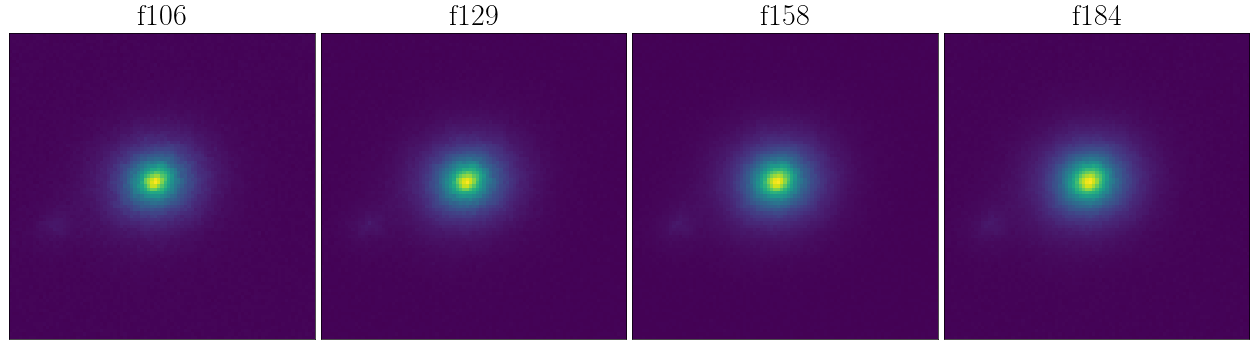

In [39]:
plot.plot_list([f106, f129, f158, f184], title_list=['f106', 'f129', 'f158', 'f184'])

In [40]:
image_b = f106
image_g = f129
image_r = f184

In [41]:
def _scale_max(image): 
    flat=image.flatten()
    flat.sort()
    scale_max = flat[int(len(flat)*0.95)]
    return scale_max

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


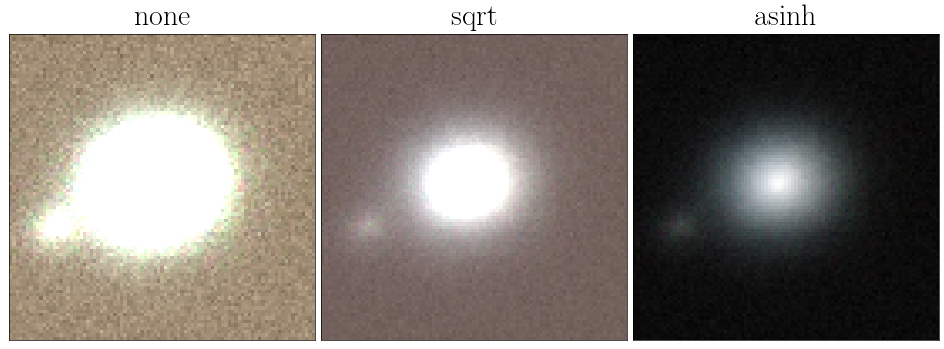

In [42]:
image = np.zeros((image_g.shape[0], image_g.shape[1], 3), dtype=float)

# none
none = deepcopy(image)
none[:,:,0] = image_b
none[:,:,1] = image_g
none[:,:,2] = image_r

# lenstronomy sqrt
sqrt = deepcopy(image)
sqrt[:,:,0] = plot_util.sqrt(image_b, scale_min=0, scale_max=_scale_max(image_b))
sqrt[:,:,1] = plot_util.sqrt(image_g, scale_min=0, scale_max=_scale_max(image_g))
sqrt[:,:,2] = plot_util.sqrt(image_r, scale_min=0, scale_max=_scale_max(image_r))

# asinh
asinh = deepcopy(image)
asinh[:,:,0] = util.asinh(image_b)
asinh[:,:,1] = util.asinh(image_g)
asinh[:,:,2] = util.asinh(image_r)

list = [none, sqrt, asinh]

plot.plot_list(list, title_list=['none', 'sqrt', 'asinh'])

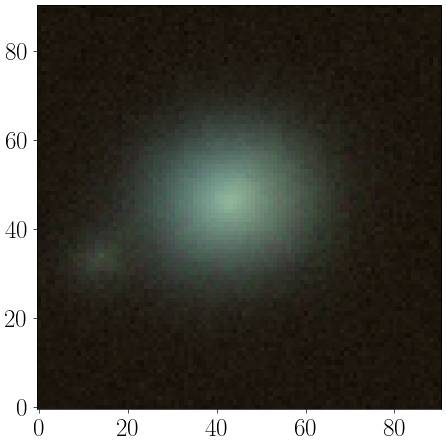

In [43]:
plot.plot(make_lupton_rgb(image_b, image_g, image_r, minimum=np.min(none), stretch=3, Q=8))